# Notebook 2 - Working with Raster Data in GemGIS

[GemGIS](https://github.com/cgre-aachen/gemgis) is a package for geographic information processing for geomodeling. In particular, data is prepared for direct use in [GemPy](https://github.com/cgre-aachen/gempy) via a GemPy Data Class. The package provides functions to process spatial data such as vector data (shape files, geojson files, geopackages), raster data (tiff-files), data retrieved from online services (WMS, WCS, WFS) or KML/XML files. 

At a later stage, functionality will be added to interactively add interfaces and orientations for a model, choosing the extent, defining custom sections and more. In addition, functionality will be provided to export data from GemPy into Geoinformation Systems (=GIS) such as QGIS or ArcGIS and Google Earth. 

# Overview

This notebook will present how existing raster files can be loaded into GemGIS, how new raster files can be created and how to work with raster files in general. The main tool that is going to be used here is [rasterio](https://rasterio.readthedocs.io/en/latest/#).

- [What is Raster Data](#raster)
- [What is rasterio?](#rasterio)
- [What is GemPy?](#gempy)
- [What are Interfaces and Orientations?](#intandor)
- [Downloading and Installing GemGIS](#gemgis)
- [Structure of GemGIS](#structure)
- [Importing Libraries](#import)
- [Version Reports](#vreport)
- [Creating a GemPy Data Class](#dataclass)
- [Example 1 - Raster Data - Digital Elevation Model](#ex1)
- [Example 2 - Raster Data - Interpolate Raster](#ex2)
- [Example 3 - Raster Data - Calculating slope, aspect and hillshades](#ex3)
- [Example 4 - Raster Data - Sampling from Raster](#ex4)
- [Example 5 - Clip Raster by Extent](#ex5)
- [Example 6 - Clip Raster by Shape](#ex6)
- [Example 7 - Save Raster as Tiff](#ex7)
- [Example 8 - Additional Manipulation Options](#ex8)

<a id='raster'></a>
## What is raster data?

In its simplest form, a raster consists of a matrix of cells (or pixels) organized into rows and columns (or a grid) where each cell contains a value representing information, such as the elevation value. Rasters are digital aerial photographs, imagery from satellites, digital pictures, or even scanned maps.

<img src="../data/Images/raster.png" width=300>

- **Rasters as basemaps**: A common use of raster data in a GIS is as a background display for other feature layers. Three main sources of raster basemaps are orthophotos from aerial photography, satellite imagery, and scanned maps. 

- **Rasters as surface maps**: Rasters are well suited for representing data that changes continuously across a landscape (surface). Elevation values measured from the earth's surface are the most common application of surface maps, but other values, such as rainfall, temperature, concentration, and population density, can also define surfaces that can be spatially analyzed.

- **Rasters as thematic maps**: Rasters representing thematic data can be derived from analyzing other data. A common analysis application is classifying a satellite image by land-cover categories. For example, you can process data through a geoprocessing model to create a raster dataset that maps suitability for a specific activity.

Source: https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/what-is-raster-data.htm

<a id='rasterio'></a>
## What is rasterio?

Rasterio reads and writes geospatial raster datasets. Rasterio employs [GDAL](https://gdal.org/) under the hood for file I/O and raster formatting. Its functions typically accept and return NumPy ndarrays. Rasterio is designed to make working with geospatial raster data more productive and more fun.

For more information see: https://pypi.org/project/rasterio/0.13.2/, https://rasterio.readthedocs.io/en/latest/

<a id='gempy'></a>
## What is GemPy?

`GemPy` is a Python-based, **open-source geomodeling library**. It is
capable of constructing complex **3D geological models** of folded
structures, fault networks and unconformities, based on the underlying
powerful **implicit representation** approach. `GemPy` was designed from the
ground up to support easy embedding in probabilistic frameworks for the
uncertainty analysis of subsurface structures.

Check out the documentation either on the main website (https://www.gempy.org/) or the specific docs site (http://docs.gempy.org/).

- GemPy Installation Help: https://docs.gempy.org/installation.html
- GemPy Tutorials: https://docs.gempy.org/tutorials/index.html
- GemPy Examples: https://docs.gempy.org/examples/index.html
- GemPy Repository: https://github.com/cgre-aachen/gempy
- GemPy Tutorial Video: https://youtu.be/n0btC5Zilyc

<a id='intandor'></a>
## What are Interfaces and Orientations?
`GemPy`is using an implicit modeling approach based on the potential field method to create geological models. The only input data required are interfaces (layer boundaries in outcrops or in wells) and orientations (dip and azimuth values of a given orientation). The necessary information for interfaces are the `X`,`Y` and `Z`coordinates as well as the `formation`. Please be aware that `GemPy` is always referring to the base of a formation! For orientations, `X`,`Y` and `Z`coordinates, the `formation` and `dip`, `azimuth` and a `polarity` values is needed. The polarity is usually set to 1. 

<img src="../data/Images/orientations.jpg" width="300">

Image Source: https://www.geolstuffmnl.com/post/measuring-strike-and-dip

<a id='gemgis'></a>
## Downloading and installing GemGIS

`GemGIS` is under constant development and the latest available version can be downloaded at https://github.com/cgre-aachen/gemgis. A pip version can be found at https://pypi.org/project/gemgis/. A dedicated documentation page will follow.

<a id='structure'></a>
## Structure of GemGIS

The core of `GemGIS` is made of the `GemPyData` class (`gemgis.py`). Its attributes can directly be utilized by `GemPy` making it easier for users to load data. Methods of the `GemPyData` class allow users to directly set these attributes. Multiple other files contain functions to manipulate vector data, raster data, etc.:

* `gemgis.py` - core file containing the `GemPyData` class
* `vector.py` - file containing functions to manipulate vector data
* `raster.py` - file containing functions to manipulate raster data
* `utils.py` - file containing utility functions frequently used for the manipulation of vector/raster data
* `wms.py` - file containing methods to load WMS services as arrays/rasters
* `visualization.py` - file containing functions to simplify plotting of spatial data
* `misc.py` - file containing functions for custom tasks 


If you have any problems using GemGIS, find a bug or have an idea for a new feature, open an issue at https://github.com/cgre-aachen/gemgis/issues. 

<a id='import'></a>
# Importing Libraries

Apart from creating a GemPyData class later in the tutorial, GemGIS is working with pure GeoDataFrames, Rasterio files and NumPy arrays to provide the user with easy data handling. ***Currently, geopandas version 0.8 is the latest stable version that is supported by GemGIS***. A general introduction to working with rasters and Rasterio objects in GemGIS is provided in the next notebook.

The first step is loading `GemGIS` and the auxiliary libraries `geopandas` and `rasterio` apart from `NumPy` and `Matplotlib`. `GemGIS` will also load `GemPy` the background. If the installation of `GemPy`was not successful, `GemGIS` cannot be used. 

In [1]:
import sys
sys.path.append('../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<a id='vreport'></a>
# Version Reports
Reporting your Python environment's package versions and hardware resources by Scooby - https://github.com/banesullivan/scooby. This overview shows the packages and their versions used to run this notebook. Upgrading or downgrading to older or newer versions may break the notebook.

In [2]:
gg.Report()

--------------------------------------------------------------------------------
  Date: Sun Oct 04 10:21:34 2020 Mitteleuropäische Sommerzeit

                OS : Windows
            CPU(s) : 16
           Machine : AMD64
      Architecture : 64bit
       Environment : Jupyter

  Python 3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:20:24)
  [MSC v.1916 64 bit (AMD64)]

              json : 2.0.9
             numpy : 1.19.1
            scooby : 0.5.6
            owslib : 0.20.0
            pandas : 1.0.5
           shapely : 1.7.1
           pyvista : 0.26.1
          rasterio : 1.1.6
         geopandas : 0.8.1
          requests : 2.24.0
             scipy : 1.5.2
           skimage : 0.17.2
        matplotlib : 3.3.2
--------------------------------------------------------------------------------

<a id='dataclass'></a>
# Creating a simple GemPy Model - GemPy Data Class

As GemGIS is providing functions to more easily create GemPy Models, a **GemPy Data Class** is being introduced. This class consists of attributes, such as the CRS of all input data, the interfaces, orientations, custom_sections, etc. It can be initiated empty or attributes can be passed during the initiation. During the course of the following notebooks, more and more attributes will be introduced. For more information about GemPy, visit https://docs.gempy.org/ or https://github.com/cgre-aachen/gempy.

## Initiating the class without attributes
Intiating the GemPy Data Class without attributes will set all of them to `None`.

In [3]:
geo_data = gg.GemPyData()

The following attributes are currently available:

In [4]:
vars(geo_data)

{'model_name': None,
 'crs': None,
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'basemap': None,
 'faults': None,
 'is_fault': None,
 'raw_i': None,
 'raw_o': None,
 'raw_dem': None,
 'slope': None,
 'hillshades': None,
 'aspect': None,
 'wms': None,
 'tectonics': None,
 'customsections': None,
 'contours': None}

## Initiating the class with attributes
The data class can also be initiated with attributes. 

In [5]:
geo_data = gg.GemPyData(model_name='Model1', 
                        crs='EPSG:4326', 
                        extent=[0., 972., 0., 1069., 300., 800.], 
                        resolution=[50,50,50],
                        stack={"Strat_Series": ('Sand', 'Ton')},
                        dem='../../gemgis/data/Test1/raster1.tif',
                        surface_colors= {'Ton':'#015482',
                                         'Sand':'#9f0052',
                                         'basement':'#ffbe00'})

In [6]:
vars(geo_data)

{'model_name': 'Model1',
 'crs': 'EPSG:4326',
 'extent': [0.0, 972.0, 0.0, 1069.0, 300.0, 800.0],
 'resolution': [50, 50, 50],
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': {'Strat_Series': ('Sand', 'Ton')},
 'dem': '../../gemgis/data/Test1/raster1.tif',
 'surface_colors': {'Ton': '#015482',
  'Sand': '#9f0052',
  'basement': '#ffbe00'},
 'geolmap': None,
 'basemap': None,
 'faults': None,
 'is_fault': None,
 'raw_i': None,
 'raw_o': None,
 'raw_dem': None,
 'slope': None,
 'hillshades': None,
 'aspect': None,
 'model_width': 972.0,
 'model_height': 1069.0,
 'model_depth': 500.0,
 'model_area': 1039068.0,
 'model_volume': 519534000.0,
 'cell_width': 19.44,
 'cell_height': 21.38,
 'cell_depth': 10.0,
 'wms': None,
 'tectonics': None,
 'customsections': None,
 'contours': None}

## Inspecting the attributes GemPy Data Class
These attributes can now be inspected. 

In [7]:
geo_data.model_name

'Model1'

In [8]:
geo_data.crs

'EPSG:4326'

In [9]:
geo_data.extent

[0.0, 972.0, 0.0, 1069.0, 300.0, 800.0]

In [10]:
geo_data.resolution

[50, 50, 50]

In [11]:
geo_data.stack

{'Strat_Series': ('Sand', 'Ton')}

In [12]:
geo_data.dem

'../../gemgis/data/Test1/raster1.tif'

In [13]:
geo_data.surface_colors

{'Ton': '#015482', 'Sand': '#9f0052', 'basement': '#ffbe00'}

<a id='ex1'></a>
# Example 1 - Raster Data - Digital Elevation Model

As a first example we will have a look at a geological map as shown below. The gray southward dipping layer is surrounded by two white layers. The topography decreases from north to south. A raster file ```raster1.tif``` containing the altitude values was created externally. This data can now be loaded and plotted as shown below. The strength of GemGIS is it that it is working with pure rasterio objects providing you with their full range of functionality.

**What is a Rasterio Object?**<br>
Opening a raster with Rasterio will create a rasterio object containing different attributes such as the raster values, the CRS, the transform and others. 

For more information see: https://rasterio.readthedocs.io/en/latest/quickstart.html#dataset-attributes

**What is a coordinate reference system?**<br>
The Coordinate Reference System (CRS) is important because the geometric shapes in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates relate to places on the Earth.

For more information see: https://geopandas.org/projections.html and https://spatialreference.org/ for codes for most commonly used projections.

For the tutorials `EPSG:4326` (WGS84 latitude-longitude projection) is used. It ranges from -180 to 180 degrees (longitude) and -90 to 90 degrees (latitude). For simplicity it is assumed that the units are meters and not degrees. This implies that the extent of the examples does not relate to the real world but a CRS is needed for transformation purposes. 


For this example we will use the following functions:

- `geo_data.set_extent(...)`


<img src="../data/Test1/task1.png" width="300">

## Loading data

The raster data will be loaded as a rasterio.io.DataSetReader object. The data is provided in the [repository](https://github.com/cgre-aachen/gemgis). The coordinate reference system (CRS) is stored within the object which is essential to know when transforming data from one CRS to another. 

In [14]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

The loaded `dem` is passed to the `geo_data.raw_dem` attribute storing the digital elevation data. This attribute is also used for subsequent plotting!

In [15]:
geo_data.raw_dem = dem.read(1)
geo_data.raw_dem

array([[482.82904, 485.51953, 488.159  , ..., 618.8612 , 620.4424 ,
        622.05786],
       [481.6521 , 484.32193, 486.93958, ..., 618.8579 , 620.44556,
        622.06714],
       [480.52563, 483.18893, 485.80444, ..., 618.8688 , 620.4622 ,
        622.08923],
       ...,
       [325.49225, 327.21985, 328.94498, ..., 353.6889 , 360.03125,
        366.3984 ],
       [325.0538 , 326.78473, 328.51276, ..., 351.80603, 357.84106,
        363.96167],
       [324.61444, 326.34845, 328.0794 , ..., 350.09247, 355.87598,
        361.78635]], dtype=float32)

The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [16]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```. For subsequent plotting, `geo_data.set_extent(...)` is recommended to be used to pass the extent to the `geo_data` object. The extent is chosen based on the dimensions of the provided map (pixels) and its scale. 

In [17]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

## Inspecting the Raster Object

Rasterio objects have different attributes that can easily be accessed. 

### Inspecting the CRS

In [18]:
dem.crs

CRS.from_epsg(4326)

### Inspecting the bounds 

In [19]:
dem.bounds

BoundingBox(left=-4.440892098500626e-16, bottom=1.3642420526593924e-12, right=971.002897605575, top=1068.1031873661339)

### Inspecting the width

In [20]:
dem.width

250

### Inspecting the height

In [21]:
dem.height

275

### Inspecting the number of bands

In [22]:
dem.count

1

### Inspecting the transform

In [23]:
dem.transform

Affine(3.8840115904223, 0.0, -4.440892098500626e-16,
       0.0, -3.8840115904223, 1068.1031873661339)

### Inspecting the data stored in the first band

In [24]:
dem.read(1)

array([[482.82904, 485.51953, 488.159  , ..., 618.8612 , 620.4424 ,
        622.05786],
       [481.6521 , 484.32193, 486.93958, ..., 618.8579 , 620.44556,
        622.06714],
       [480.52563, 483.18893, 485.80444, ..., 618.8688 , 620.4622 ,
        622.08923],
       ...,
       [325.49225, 327.21985, 328.94498, ..., 353.6889 , 360.03125,
        366.3984 ],
       [325.0538 , 326.78473, 328.51276, ..., 351.80603, 357.84106,
        363.96167],
       [324.61444, 326.34845, 328.0794 , ..., 350.09247, 355.87598,
        361.78635]], dtype=float32)

## Plotting Data

The raster data can now be plotted next to the geological map without any manipulation by using ```plt.imshow(...)```. Bright values indicate high altitudes, dark colors indicate low altitudes. When plotting the raster it is necessary to provide the extent of the raster as defined above. This way, the raster is scaled to the true extent of the geological map. A second important thing is that the height values of the object can be accessed with ```dem.read(1)``` where 1 is equal to the band number of the raster.

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

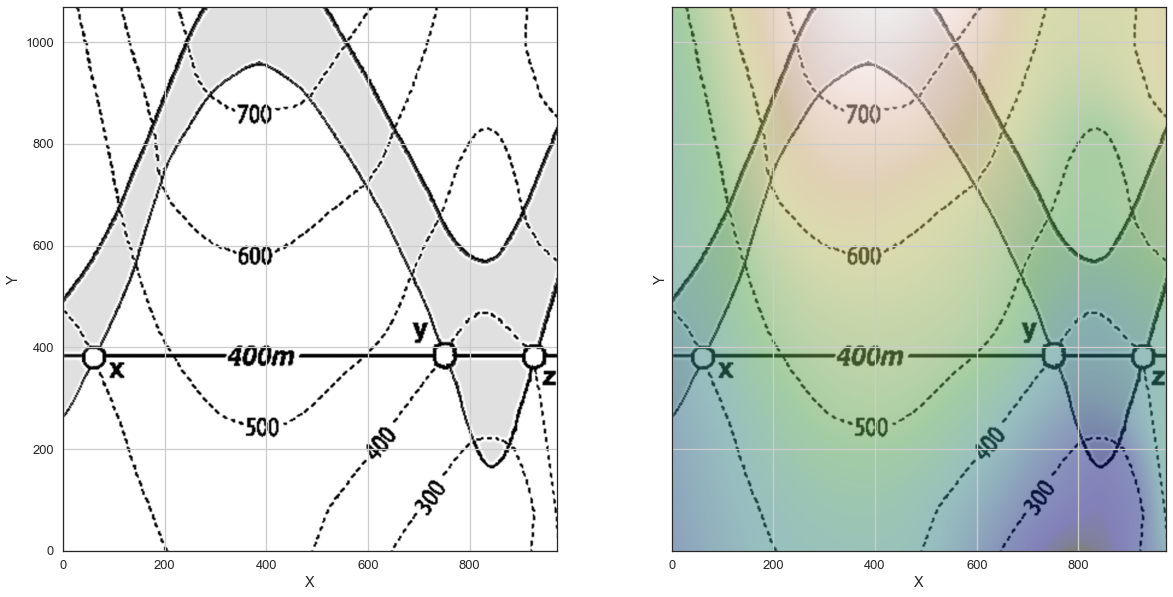

In [25]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_topo=True, 
                           hide_topo_left=True)

<a id='ex2'></a>
# Example 2 - Raster Data - Interpolating Raster Data

As a second example we will have a look at the same geological map as before. Instead of loading a raster, contour lines with attributed height values are used to interpolate a raster. 

For this example we will use the following functions:

- `geo_data.set_extent(...)`
- `gg.raster.interpolate(...)`


<img src="../data/Test1/task1.png" width="300">

## Loading data
The raster data will be loaded as a rasterio.io.DataSetReader object. The data is provided in the repository. The coordinate reference system (CRS) is stored within the object which is essential to know when transforming data from one CRS to another. 

In [26]:
topo = gpd.read_file('../../gemgis/data/Test1/topo1.shp')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

The loaded `dem` is passed to the `geo_data.raw_dem` attribute storing the digital elevation data. This attribute is also used for subsequent plotting!

In [27]:
geo_data.raw_dem = topo
geo_data.raw_dem

,id,Z,geometry
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77...."
1,None,300,"LINESTRING (645.965 0.525, 685.141 61.866, 724..."
2,None,400,"LINESTRING (490.292 0.525, 505.756 40.732, 519..."
3,None,600,"LINESTRING (911.433 1068.585, 908.856 1026.831..."
4,None,700,"LINESTRING (228.432 1068.585, 239.772 1017.037..."
5,None,600,"LINESTRING (114.513 1068.069, 151.627 930.438,..."
6,None,500,"LINESTRING (28.429 1067.554, 71.728 866.004, 1..."


The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [28]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```. For subsequent plotting, `geo_data.set_extent(...)` is recommended to be used to pass the extent to the `geo_data` object. The extent is chosen based on the dimensions of the provided map (pixels) and its scale. 

In [29]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

## Inspecting the GeoDataFrame

Rasterio objects have different attributes that can easily be accessed. 

In [30]:
geo_data.raw_dem.head()

,id,Z,geometry
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77...."
1,None,300,"LINESTRING (645.965 0.525, 685.141 61.866, 724..."
2,None,400,"LINESTRING (490.292 0.525, 505.756 40.732, 519..."
3,None,600,"LINESTRING (911.433 1068.585, 908.856 1026.831..."
4,None,700,"LINESTRING (228.432 1068.585, 239.772 1017.037..."


In [31]:
geo_data.raw_dem.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Plotting Data

The raster data can now be plotted next to the geological map without any manipulation by using ```plt.imshow(...)```. Bright values indicate high altitudes, dark colors indicate low altitudes. When plotting the raster it is necessary to provide the extent of the raster as defined above. This way, the raster is scaled to the true extent of the geological map. A second important thing is that the height values of the object can be accessed with ```dem.read(1)``` where 1 is equal to the band number of the raster. These were combined in a designated plotting function `gg.visualization.plot_data(...)`.

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

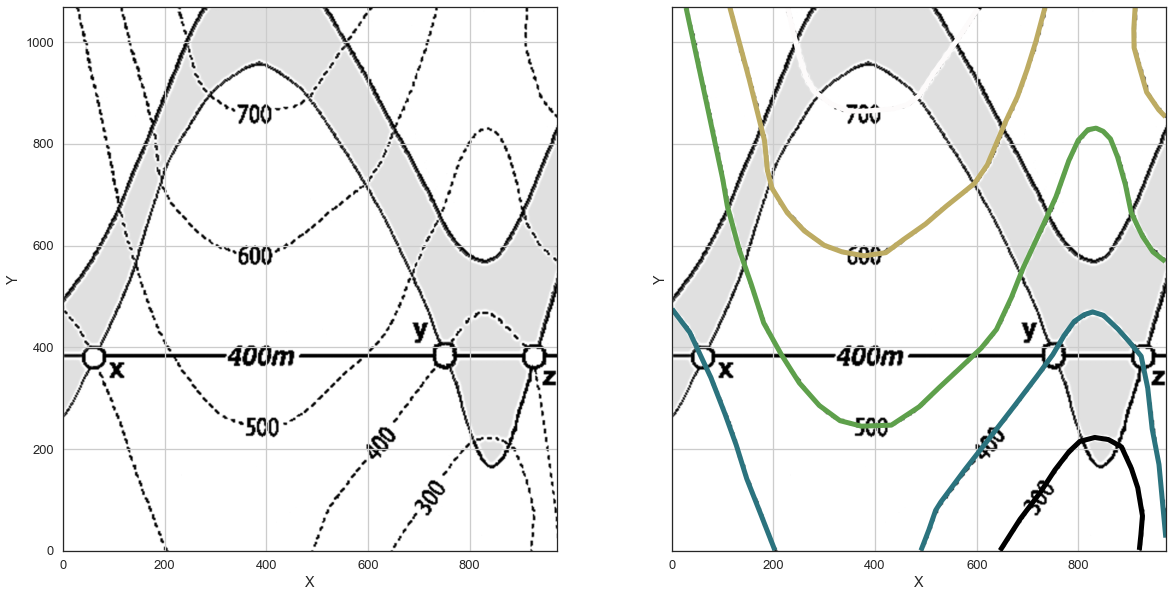

In [32]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_topo=True, 
                           )

## Interpolating the Raster

Several methods have been implemented into GemGIS. These include the methods ```nearest```, ```cubic``` and ```linear``` of ```scipy.interpolate.griddata``` and ```Rbf``` of ```scipy.interpolate.rbf```. The different methods can be accessed by passing the argument ```method= 'method_name'```. More information about the interpolation methods can be found here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html and https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Rbf.html. 

In [33]:
geo_data.raw_dem = gg.vector.interpolate_raster(geo_data.raw_dem, method='rbf')
geo_data.raw_dem

array([[499.90110024, 499.86421238, 499.82858152, ..., 625.37307284,
        625.78164892, 626.18920124],
       [499.53566482, 499.49887905, 499.4633306 , ..., 625.17315916,
        625.58165735, 625.98912699],
       [499.18752484, 499.15158818, 499.11692808, ..., 624.97739453,
        625.38574125, 625.79305697],
       ...,
       [411.5023835 , 411.37335931, 411.24503355, ..., 384.8252337 ,
        386.21293421, 387.56684012],
       [411.66101945, 411.5316941 , 411.40306465, ..., 384.4299191 ,
        385.80964238, 387.15718098],
       [411.82014581, 411.69052091, 411.56158939, ..., 384.04962954,
        385.42140506, 386.76248969]])

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

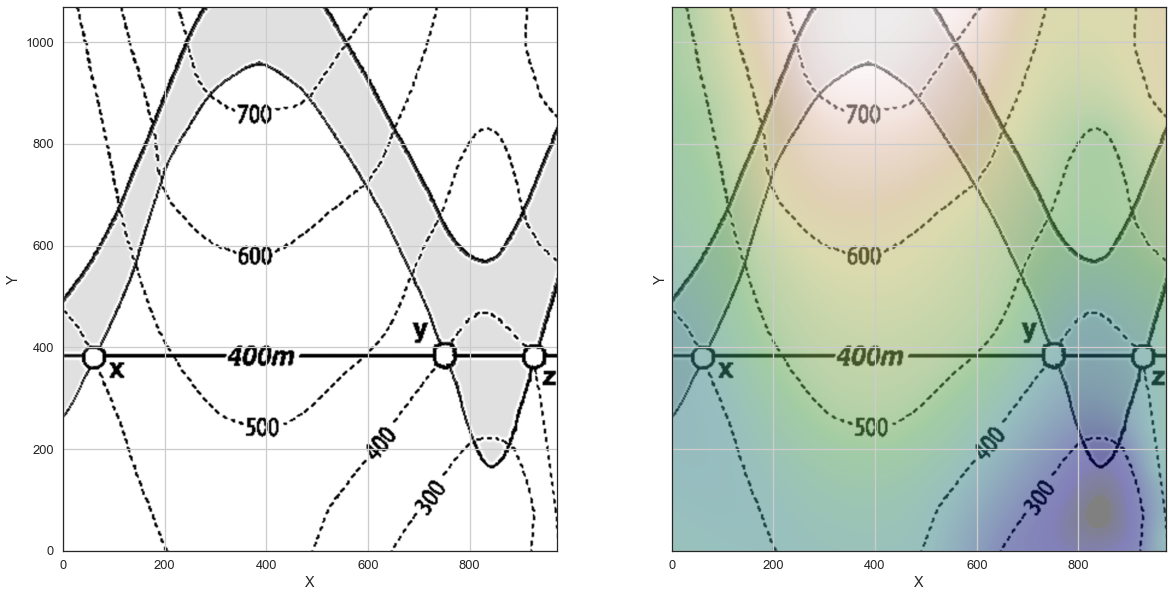

In [34]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_topo=True,
                           hide_topo_left=True
                           )

<a id='ex3'></a>
# Example 3 - Raster Data - Calculating slope, aspect and hillshades

As a third example it is shown how to calculate the slope (dipping angle) and aspect (dipping direction) of a raster which can then be used to obtain orientations (if the raster is a lithological layer) and hillshades to better visualize the raster data. 

## Loading Data

In [35]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

The loaded `dem` is passed to the `geo_data.raw_dem` attribute storing the digital elevation data. This attribute is also used for subsequent plotting!

In [36]:
geo_data.raw_dem = dem.read(1)
geo_data.raw_dem

array([[482.82904, 485.51953, 488.159  , ..., 618.8612 , 620.4424 ,
        622.05786],
       [481.6521 , 484.32193, 486.93958, ..., 618.8579 , 620.44556,
        622.06714],
       [480.52563, 483.18893, 485.80444, ..., 618.8688 , 620.4622 ,
        622.08923],
       ...,
       [325.49225, 327.21985, 328.94498, ..., 353.6889 , 360.03125,
        366.3984 ],
       [325.0538 , 326.78473, 328.51276, ..., 351.80603, 357.84106,
        363.96167],
       [324.61444, 326.34845, 328.0794 , ..., 350.09247, 355.87598,
        361.78635]], dtype=float32)

The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [37]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```. For subsequent plotting, `geo_data.set_extent(...)` is recommended to be used to pass the extent to the `geo_data` object. The extent is chosen based on the dimensions of the provided map (pixels) and its scale. 

In [38]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

## Calculating hillshades

In [39]:
geo_data.hillshades = gg.raster.calculate_hillshades(dem)
geo_data.hillshades

array([[250.04817, 250.21147, 250.38988, ..., 235.01764, 235.0847 ,
        235.0842 ],
       [249.88553, 250.00044, 250.11102, ..., 234.94745, 235.01614,
        235.01909],
       [249.53595, 249.55322, 249.53058, ..., 234.76364, 234.8419 ,
        234.8502 ],
       ...,
       [241.74646, 241.70064, 241.6519 , ..., 242.18367, 243.27975,
        244.16016],
       [241.7718 , 241.72682, 241.67903, ..., 242.60681, 243.4156 ,
        244.1525 ],
       [241.78993, 241.74619, 241.69716, ..., 243.24301, 243.86024,
        244.4877 ]], dtype=float32)

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

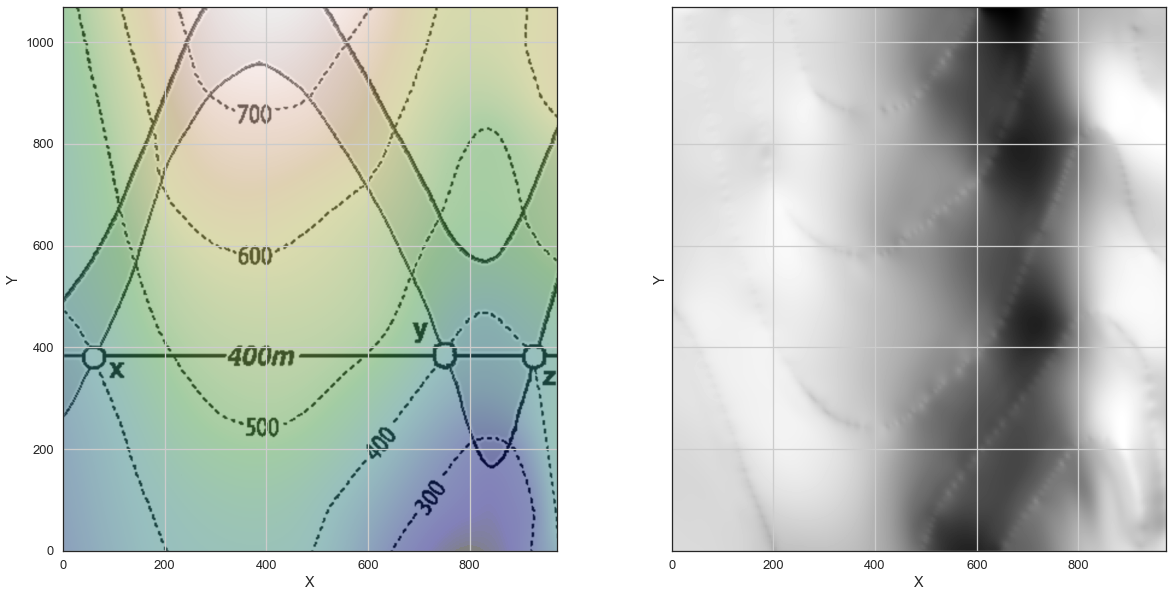

In [40]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_topo=True,
                           show_hillshades=True,
                           )

## Calcaculating slope

In [41]:
geo_data.slope = gg.raster.calculate_slope(dem)
geo_data.slope

array([[37.092472, 36.95191 , 36.649662, ..., 21.988844, 22.367924,
        22.584248],
       [36.81925 , 36.64412 , 36.29031 , ..., 22.073963, 22.447533,
        22.661581],
       [36.58269 , 36.37289 , 35.983826, ..., 22.148998, 22.519993,
        22.73199 ],
       ...,
       [24.648827, 24.624249, 24.582832, ..., 59.4837  , 60.137577,
        60.524643],
       [24.690985, 24.6643  , 24.620476, ..., 58.058964, 58.838966,
        59.296883],
       [24.728727, 24.70153 , 24.65444 , ..., 56.89897 , 57.80261 ,
        58.33754 ]], dtype=float32)

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

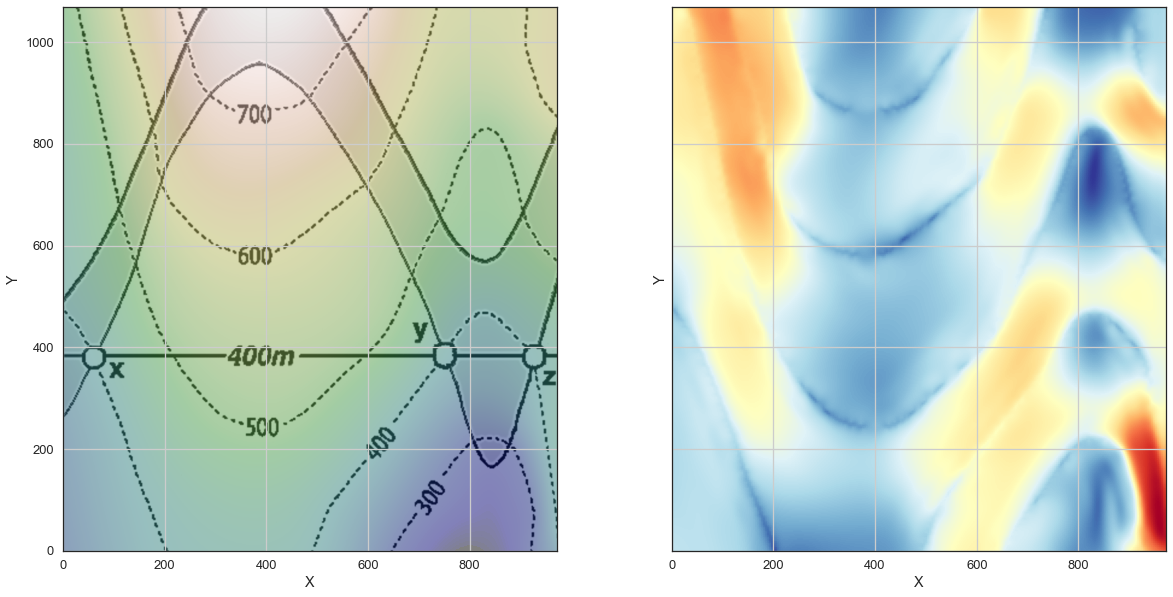

In [42]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_topo=True,
                           show_slope=True,
                           )

## Calculating Aspect

In [43]:
geo_data.aspect = gg.raster.calculate_aspect(dem)
geo_data.aspect

array([[246.37328, 245.80156, 245.04022, ..., 269.87958, 270.11377,
        270.32904],
       [246.66574, 246.21323, 245.62051, ..., 270.13763, 270.35413,
        270.55423],
       [247.50159, 247.31534, 247.10617, ..., 270.65033, 270.82956,
        271.00793],
       ...,
       [255.7753 , 255.86978, 255.94418, ..., 252.48175, 249.94934,
        247.904  ],
       [255.77164, 255.85995, 255.92754, ..., 253.22346, 251.12756,
        249.35535],
       [255.78168, 255.86548, 255.93127, ..., 253.28476, 251.4231 ,
        249.79376]], dtype=float32)

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

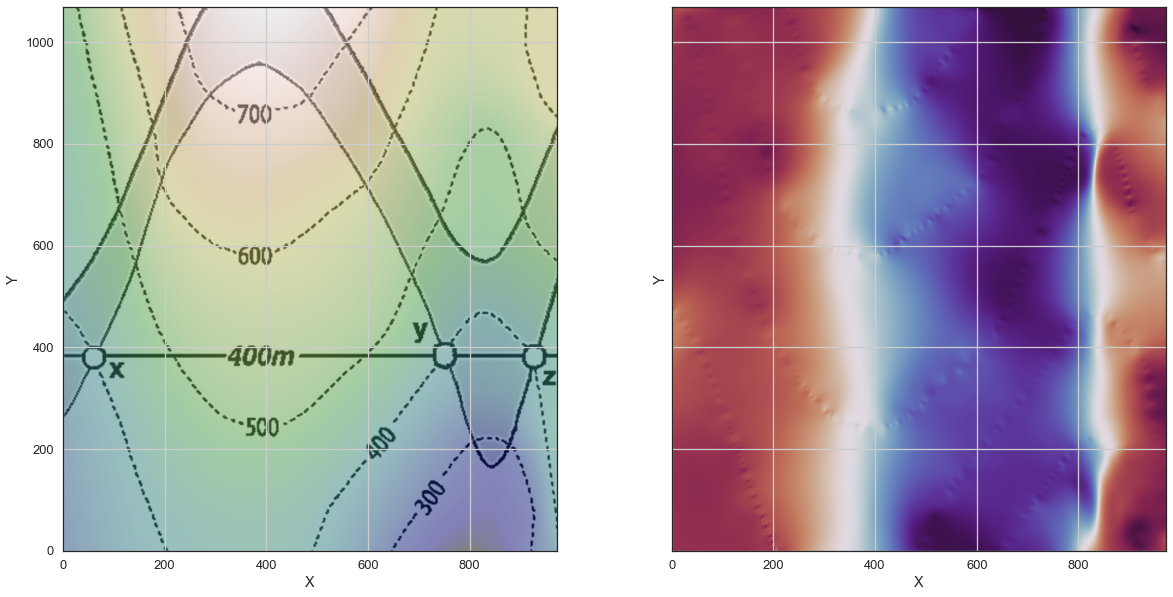

In [44]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_topo=True,
                           show_aspect=True,
                           )

<a id='ex4'></a>
# Example 4 - Raster Data - Sampling from Raster

As a fourth example we are going to sample values from a raster. Sampling height values from a raster was already utilized in the previous notebook. 

**The following functions will be used:**
- `geo_data.set_extent(...)`
- `gg.raster.sample(...)`
- `gg.raster.sample_randomly(...)`
- `gg.raster.sample_orientations(...)`
- `gg.raster.sample_interfaces(...)`

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```. For subsequent plotting, `geo_data.set_extent(...)` is recommended to be used to pass the extent to the `geo_data` object. The extent is chosen based on the dimensions of the provided map (pixels) and its scale. 

In [45]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

## Load Data

In [46]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

The loaded `dem` is passed to the `geo_data.raw_dem` attribute storing the digital elevation data. This attribute is also used for subsequent plotting!

In [47]:
geo_data.raw_dem = dem.read(1)
geo_data.raw_dem

array([[482.82904, 485.51953, 488.159  , ..., 618.8612 , 620.4424 ,
        622.05786],
       [481.6521 , 484.32193, 486.93958, ..., 618.8579 , 620.44556,
        622.06714],
       [480.52563, 483.18893, 485.80444, ..., 618.8688 , 620.4622 ,
        622.08923],
       ...,
       [325.49225, 327.21985, 328.94498, ..., 353.6889 , 360.03125,
        366.3984 ],
       [325.0538 , 326.78473, 328.51276, ..., 351.80603, 357.84106,
        363.96167],
       [324.61444, 326.34845, 328.0794 , ..., 350.09247, 355.87598,
        361.78635]], dtype=float32)

The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [48]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

## Plot Data

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

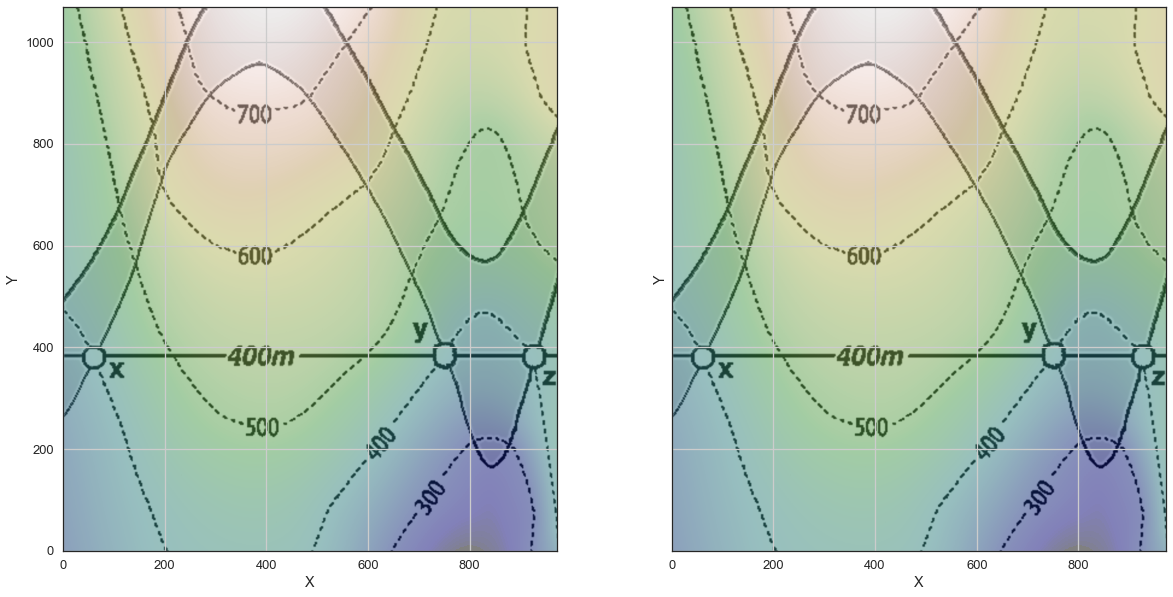

In [49]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_topo=True,
                           )

## Sample from raster

`gg.raster.sample(...)` samples from the provided raster at a given point and returns the raster value at that point.

In [50]:
sample = gg.raster.sample(geo_data.raw_dem, geo_data.extent, [500,500])
sample

562.0227

## Sample from raster randomly
`gg.raster.sample_randomly(...)` samples from the provided raster at a given point and returns the raster value at that point in addition to the coordinates of the sampled location.

In [51]:
sample = gg.raster.sample_randomly(geo_data.raw_dem, geo_data.extent)
sample

(544.60254, [776.9082721912506, 897.1590430313305])

## Sample orientations from raster

`gg.raster.sample_orientations(...)` samples from the provided raster at a given locations and returns a DataFrame containing all necessary information.

<div class="alert alert-block alert-warning">
<b>Attention:</b> Sampling orientations from a raster should only be performed if the raster is NOT the digital elevation model but a already constructed subsurface layer!
</div>

In [52]:
orientations = gg.raster.sample_orientations(geo_data.raw_dem, geo_data.extent, formation='surface')
orientations

,X,Y,Z,dip,azimuth,polarity,formation
0,961.17,799.79,557.57,21.46,26.60,1.00,surface
1,272.59,843.74,677.21,23.80,322.06,1.00,surface
2,100.34,478.80,454.02,19.48,301.49,1.00,surface
3,883.15,313.87,367.52,34.69,283.06,1.00,surface
4,279.72,139.00,446.91,14.95,293.46,1.00,surface
5,18.82,725.68,441.37,23.33,284.69,1.00,surface
6,205.70,283.87,466.56,44.81,317.32,1.00,surface
7,477.81,57.04,413.39,34.36,67.11,1.00,surface
8,558.04,156.85,407.58,14.02,56.02,1.00,surface
9,572.80,748.04,617.06,27.38,291.24,1.00,surface


It is also possible to provide a list of points with locations at which orientation values are being sampled. 

In [53]:
orientations = gg.raster.sample_orientations(geo_data.raw_dem, geo_data.extent, points= [500,500],formation='surface')
orientations

,X,Y,Z,dip,azimuth,polarity,formation
0,500.00,500.00,562.02,19.24,40.72,1.00,surface


In [54]:
orientations = gg.raster.sample_orientations(geo_data.raw_dem, geo_data.extent, points= [[500,500], [600,600]],formation='surface')
orientations

,X,Y,Z,dip,azimuth,polarity,formation
0,500.00,500.00,562.02,19.24,40.72,1.00,surface
1,600.00,600.00,555.28,27.63,55.80,1.00,surface


## Sample interfaces from raster

`gg.raster.sample_interfaces(...)` samples from the provided raster at a given locations and returns a DataFrame containing all necessary information.

<div class="alert alert-block alert-warning">
<b>Attention:</b> Sampling interfaces from a raster should only be performed if the raster is NOT the digital elevation model but a already constructed subsurface layer!
</div>

In [55]:
interfaces = gg.raster.sample_interfaces(geo_data.raw_dem, geo_data.extent, formation='surface')
interfaces

,X,Y,Z,formation
0,405.35,770.03,668.40,surface
1,0.11,323.19,364.70,surface
2,142.65,98.71,394.76,surface
3,181.04,369.40,478.78,surface
4,385.66,576.00,598.99,surface
5,407.46,732.50,652.48,surface
6,198.73,938.71,650.97,surface
7,26.62,716.73,445.58,surface
8,405.62,597.24,604.06,surface
9,136.46,211.77,405.15,surface


It is also possible to provide a list of point with locations at which interfaces are being sampled.

In [56]:
interfaces = gg.raster.sample_interfaces(geo_data.raw_dem, geo_data.extent, points=[500,500],formation='surface')
interfaces

,X,Y,Z,formation
0,500.00,500.00,562.02,surface


In [57]:
interfaces = gg.raster.sample_interfaces(geo_data.raw_dem, geo_data.extent, points=[[500,500],[600,600]],formation='surface')
interfaces

,X,Y,Z,formation
0,500.00,500.00,562.02,surface
1,600.00,600.00,555.28,surface


<a id='ex5'></a>
# Example 5 - Clip Raster by Extent

Raster data obtained form external sources may not always fit the desired modeling extent. The function `gg.raster.clip_by_extent(...)` can be used to clip raster data to a provided extent. For this example, `raster1.tif`is loaded and clipped.

## Loading Data

In [58]:
geolmap = rasterio.open('../data/Test1/task1.tif')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')

The loaded `dem` is passed to the `geo_data.raw_dem` attribute storing the digital elevation data. This attribute is also used for subsequent plotting!

In [59]:
geo_data.raw_dem = dem.read(1)
geo_data.raw_dem

array([[482.82904, 485.51953, 488.159  , ..., 618.8612 , 620.4424 ,
        622.05786],
       [481.6521 , 484.32193, 486.93958, ..., 618.8579 , 620.44556,
        622.06714],
       [480.52563, 483.18893, 485.80444, ..., 618.8688 , 620.4622 ,
        622.08923],
       ...,
       [325.49225, 327.21985, 328.94498, ..., 353.6889 , 360.03125,
        366.3984 ],
       [325.0538 , 326.78473, 328.51276, ..., 351.80603, 357.84106,
        363.96167],
       [324.61444, 326.34845, 328.0794 , ..., 350.09247, 355.87598,
        361.78635]], dtype=float32)

The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [60]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

## Original Raster Extent

In [61]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

## Setting the Extent

In [62]:
extent = gg.utils.set_extent(250,750,250,750)
extent

[250, 750, 250, 750]

## Clipping the Data

In [63]:
raster_clipped = gg.raster.clip_by_extent(raster=dem, bbox=extent, bbox_crs='EPSG:4326', save=False)
raster_clipped

array([[-3.4028231e+38, -3.4028231e+38, -3.4028231e+38, ...,
        -3.4028231e+38, -3.4028231e+38, -3.4028231e+38],
       [ 6.3758057e+02,  6.3923047e+02,  6.4081403e+02, ...,
         5.1282501e+02,  5.1069501e+02, -3.4028231e+38],
       [ 6.3655066e+02,  6.3816858e+02,  6.3972205e+02, ...,
         5.1211084e+02,  5.1001215e+02, -3.4028231e+38],
       ...,
       [ 4.7936191e+02,  4.8101117e+02,  4.8260156e+02, ...,
         3.4516803e+02,  3.4306039e+02, -3.4028231e+38],
       [ 4.7802222e+02,  4.7967847e+02,  4.8127704e+02, ...,
         3.4310706e+02,  3.4098468e+02, -3.4028231e+38],
       [ 4.7665253e+02,  4.7831140e+02,  4.7991501e+02, ...,
         3.4105698e+02,  3.3892212e+02, -3.4028231e+38]], dtype=float32)

## Plotting the Data

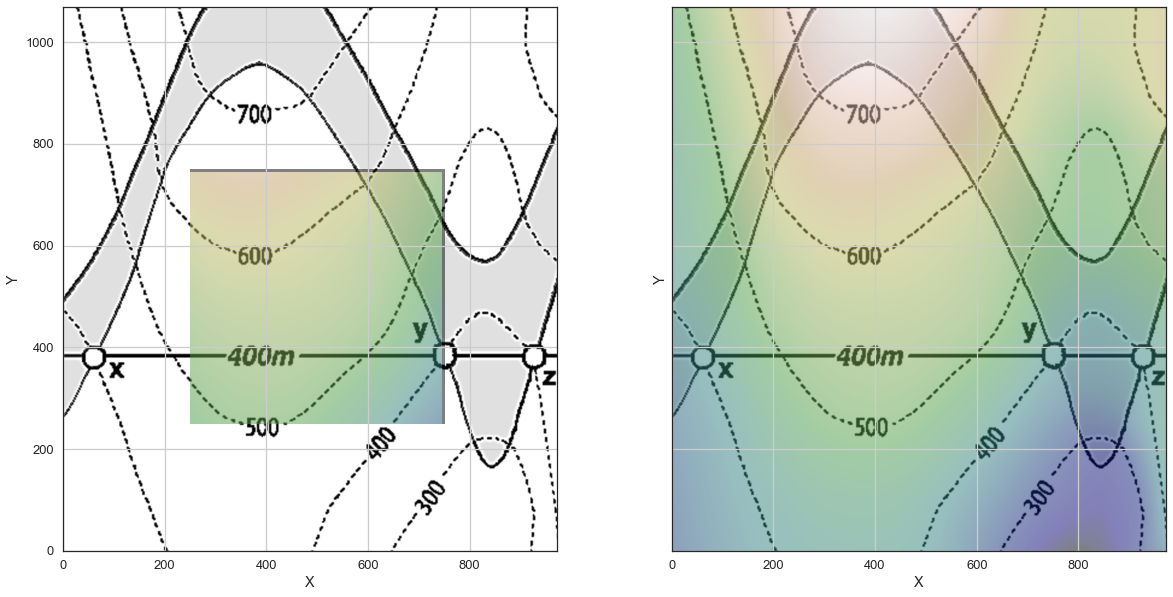

In [64]:
fig, ax1, ax2 = gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_topo=True,
                           hide_topo_left=True)

ax1.imshow(np.flipud(raster_clipped), origin = 'lower', cmap = 'gist_earth', extent = extent, alpha=0.5, vmin=geo_data.raw_dem.min(), vmax= geo_data.raw_dem.max())

<a id='ex6'></a>
# Example 6 - Clip Raster by Shape

A raster cannot only be clipped by an extent but also by a shape. This can be done using the function `gg.raster.clip_by_shape(...)`. `raster1.tif` is once again used for clipping.

## Loading Data

In [65]:
geolmap = rasterio.open('../data/Test1/task1.tif')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
extent = gpd.read_file('../../gemgis/data/Test1/extent1_raster_clipping.shp')

The loaded `dem` is passed to the `geo_data.raw_dem` attribute storing the digital elevation data. This attribute is also used for subsequent plotting!

In [66]:
geo_data.raw_dem = dem.read(1)
geo_data.raw_dem

array([[482.82904, 485.51953, 488.159  , ..., 618.8612 , 620.4424 ,
        622.05786],
       [481.6521 , 484.32193, 486.93958, ..., 618.8579 , 620.44556,
        622.06714],
       [480.52563, 483.18893, 485.80444, ..., 618.8688 , 620.4622 ,
        622.08923],
       ...,
       [325.49225, 327.21985, 328.94498, ..., 353.6889 , 360.03125,
        366.3984 ],
       [325.0538 , 326.78473, 328.51276, ..., 351.80603, 357.84106,
        363.96167],
       [324.61444, 326.34845, 328.0794 , ..., 350.09247, 355.87598,
        361.78635]], dtype=float32)

The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [67]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

## Original Raster Extent

In [68]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

## Clipping the Data

In [69]:
raster_clipped = gg.raster.clip_by_shape(raster=geo_data.raw_dem, shape=extent, save=False, extent_raster=geo_data.extent)
raster_clipped

array([[655.953  , 658.1819 , 660.3091 , ..., 532.208  , 529.6013 ,
        527.05566],
       [654.8338 , 657.0331 , 659.1328 , ..., 531.0092 , 528.4121 ,
        525.87915],
       [653.73596, 655.90546, 657.9773 , ..., 529.8434 , 527.25793,
        524.7397 ],
       ...,
       [499.59067, 500.6053 , 501.47888, ..., 382.12103, 380.24408,
        378.42743],
       [498.6479 , 499.7327 , 500.50302, ..., 380.37616, 378.49292,
        376.6703 ],
       [497.63025, 498.81998, 499.816  , ..., 378.6053 , 376.71375,
        374.8832 ]], dtype=float32)

## Plotting the Data

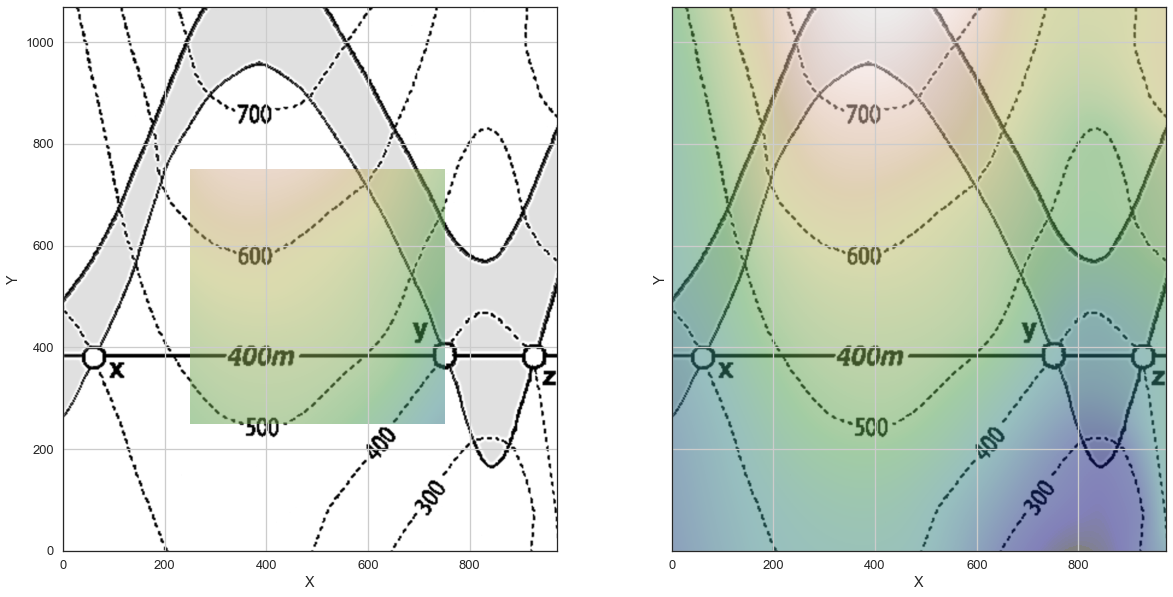

In [70]:
fig, ax1, ax2 = gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_topo=True,
                           hide_topo_left=True)

ax1.imshow(np.flipud(raster_clipped), origin = 'lower', cmap = 'gist_earth', extent = gg.utils.set_extent(gdf=extent), alpha=0.5, vmin=geo_data.raw_dem.min(), vmax= geo_data.raw_dem.max())

<a id='ex7'></a>
# Example 7 - Save Raster as Tiff

Raster data created or manipulated within GemGIS can be saved to disk using `gg.raster.save_as_tiff(...)`. 

## Loading raw data and interpolate raster

For this example, we are using the data used in Example 2 and interpolate a raster based on contour lines. This new raster/array will then be saved to disk.

In [71]:
topo = gpd.read_file('../../gemgis/data/Test1/topo1.shp')
topo.bounds

,minx,miny,maxx,maxy
0,0.74,0.90,202.96,475.44
1,645.96,0.52,925.87,222.69
2,490.29,0.52,971.74,469.61
3,908.86,853.12,971.23,1068.58
4,228.43,864.46,602.67,1068.58
5,114.51,579.92,734.11,1068.07
6,28.43,244.86,970.71,1067.55


In [72]:
extent = gg.utils.set_extent(0,972,0,1069)
extent

[0, 972, 0, 1069]

In [73]:
topo_interpolated = gg.vector.interpolate_raster(topo, method='rbf', extent=extent)
print(topo_interpolated.shape)
topo_interpolated

(1069, 972)


array([[499.7352544 , 499.69741783, 499.6608102 , ..., 624.96425928,
        625.37356864, 625.78184636],
       [499.37854013, 499.34118978, 499.30507933, ..., 624.76660921,
        625.17580463, 625.58396488],
       [499.03858869, 499.00243061, 498.96757748, ..., 624.57315753,
        624.98216381, 625.39013379],
       ...,
       [411.68175791, 411.55205944, 411.42305752, ..., 383.56983225,
        384.97746347, 386.35247242],
       [411.84087221, 411.7108753 , 411.58157241, ..., 383.18929221,
        384.58783866, 385.95528678],
       [412.00047561, 411.87018184, 411.74057958, ..., 382.823644  ,
        384.21320288, 385.57308212]])

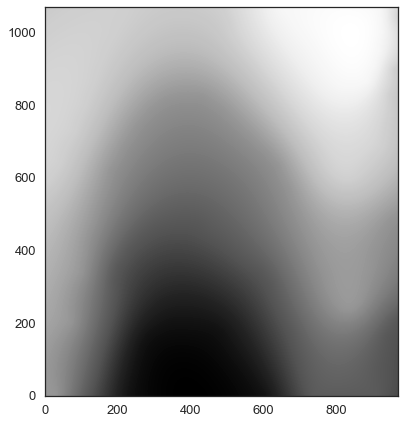

In [74]:
plt.imshow(topo_interpolated, origin='lower', extent=extent)

## Save raster

In [75]:
gg.raster.save_as_tiff('../data/Test1/test.tif', topo_interpolated, extent, 'EPSG:4326')

## Reload raster and plot

In [76]:
dem = rasterio.open('../data/Test1/test.tif')
print(dem.read(1).shape)
print(dem.res)

(1069, 972)
(1.0, 1.0)


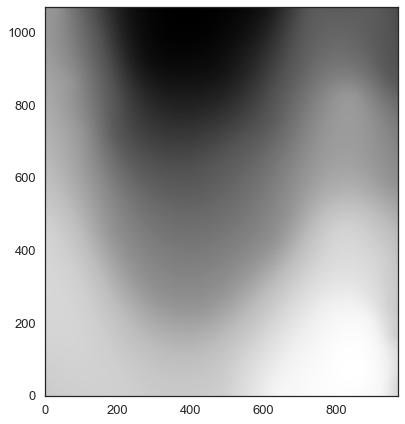

In [77]:
plt.imshow(dem.read(1), origin='lower', extent=extent)

<a id='ex8'></a>
# Example 8 - Additional Manipulation Options

Additional manipulation options for rasters are implemented in the following functions:

- `gg.raster.calculate_difference(...)` 
- `gg.raster.resize_raster(...)` - resizing the raster will change the resolution of each cell
- `gg.raster.resize_by_array(...)`

## Rescale Raster

In [78]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
dem.read(1).shape

(275, 250)

In [79]:
dem_resized = gg.raster.resize_raster(dem, [0,972,0,1069])
dem_resized.shape

(1069, 972)

## Rescale Raster by array

In [80]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
array = np.load('../../gemgis/data/Test1/array_rbf.npy')
print(dem.read(1).shape)
print(array.shape)

(275, 250)
(1069, 972)


In [81]:
dem_resized = gg.raster.resize_by_array(dem, array)
dem_resized.shape

(1069, 972)

## Calculate Difference

In [82]:
diff = gg.raster.calculate_difference(dem_resized, array, flip_array=True)
diff

array([[-16.51273354, -17.16587864, -17.05297727, ...,  -3.54311679,
         -3.90506201,  -4.72869099],
       [-15.8425801 , -16.49720058, -16.38419852, ...,  -3.34540037,
         -3.70726771,  -4.5304478 ],
       [-15.5287724 , -16.1840894 , -16.0720062 , ...,  -3.1493916 ,
         -3.51110746,  -4.33419466],
       ...,
       [-86.18124703, -86.49808465, -86.31980162, ..., -23.57712579,
        -24.79368372, -27.67548269],
       [-86.35254777, -86.66914527, -86.49055855, ..., -23.24394498,
        -24.45270878, -27.32658406],
       [-86.3989422 , -86.71502653, -86.53616825, ..., -22.31174501,
        -23.51100467, -26.39234199]])

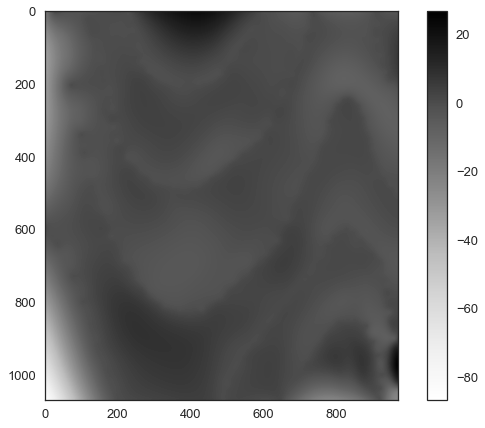

In [83]:
im = plt.imshow(diff)
cbar = plt.colorbar(im)

Text(0, 0.5, 'Frequency')

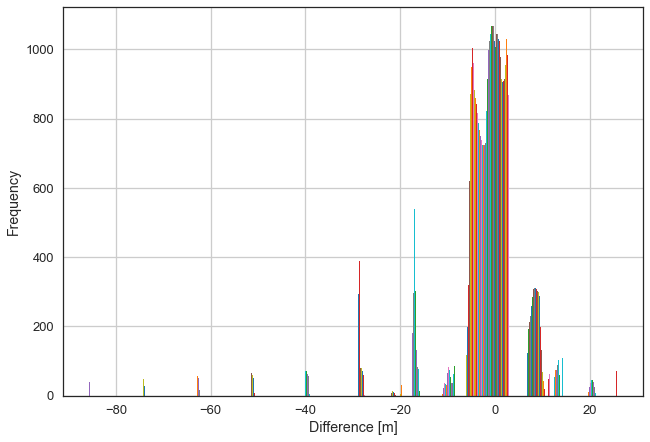

In [84]:
plt.hist(diff);
plt.grid()
plt.xlabel('Difference [m]')
plt.ylabel('Frequency')

# Version Report

In [85]:
import scooby
scooby.Report(additional=[gpd, rasterio, gg])

--------------------------------------------------------------------------------
  Date: Sun Oct 04 10:21:59 2020 Mitteleuropäische Sommerzeit

                OS : Windows
            CPU(s) : 16
           Machine : AMD64
      Architecture : 64bit
       Environment : Jupyter

  Python 3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:20:24)
  [MSC v.1916 64 bit (AMD64)]

         geopandas : 0.8.1
          rasterio : 1.1.6
            gemgis : 0.1.2
             numpy : 1.19.1
             scipy : 1.5.2
           IPython : 7.18.1
        matplotlib : 3.3.2
            scooby : 0.5.6
--------------------------------------------------------------------------------